## 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))

X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

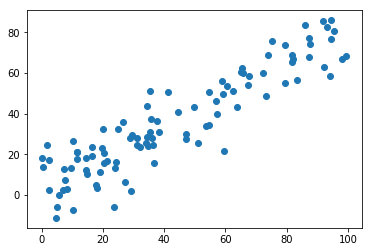

In [3]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)  # np.mean(X, axis=0) 为 1 * n 矩阵

In [5]:
X[:10, :]

array([[91.98835143, 85.6135265 ],
       [41.18915152, 50.70563926],
       [87.61196073, 74.24579864],
       [81.81000019, 68.75739376],
       [79.37815595, 73.61456863],
       [49.90323761, 43.25273669],
       [34.33939562, 43.59528745],
       [23.91129303, 13.04289334],
       [59.08654372, 49.69149488],
       [82.04246058, 67.0947431 ]])

In [6]:
X_demean = demean(X)

In [7]:
X_demean[:10,:]

array([[ 48.47147289,  49.57688632],
       [ -2.32772702,  14.66899908],
       [ 44.09508219,  38.20915846],
       [ 38.29312165,  32.72075358],
       [ 35.86127741,  37.57792845],
       [  6.38635907,   7.21609651],
       [ -9.17748292,   7.55864727],
       [-19.60558551, -22.99374684],
       [ 15.56966518,  13.6548547 ],
       [ 38.52558204,  31.05810292]])

In [8]:
np.mean(X, axis=0)

array([43.51687854, 36.03664018])

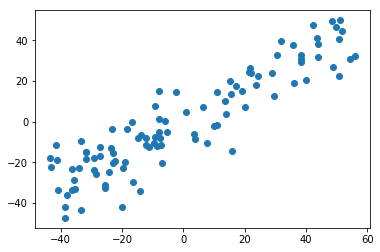

In [9]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.show()

### 梯度上升法

In [10]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [11]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [12]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [13]:
def direction(w):
    return w / np.linalg.norm(w)    # np.linalg.norm(w) 求w的长

def gradient_ascent(df, X, ini_w, eta, n_iters=1e4, epsilon=1e-8):

    cur_iter = 0
    w = direction(ini_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)                                 # 注意1：每次求一个单位向量
            
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    
    return w

In [14]:
ini_w = np.random.random(X.shape[1])  # 注意2：不能有0向量初始化
ini_w

array([0.01322218, 0.18662714])

In [15]:
eta = 0.01

In [16]:
# 注意3： 不能使用StandardScaler 标准化数据

In [17]:
gradient_ascent(df_debug, X, ini_w, eta)

array([0.77030385, 0.63767702])

In [18]:
gradient_ascent(df_math, X, ini_w, eta)

array([0.77030385, 0.63767702])

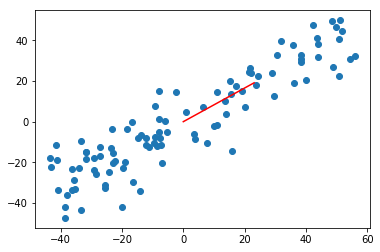

In [19]:
w = gradient_ascent(df_math, X, ini_w, eta)

plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

In [20]:
X2 = np.empty((100, 2))

X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3. 

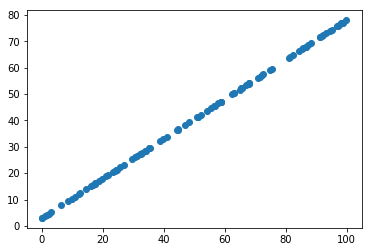

In [21]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [22]:
X2_demean = demean(X2)

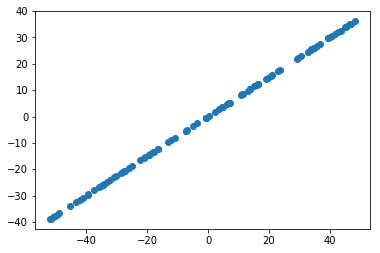

In [23]:
plt.scatter(X2_demean[:,0], X2_demean[:, 1])
plt.show()

In [24]:
ini_w2 = np.random.random(X2.shape[1])  # 注意2：不能有0向量初始化
ini_w2

array([0.81044469, 0.91487178])

In [25]:
gradient_ascent(df_debug, X2, ini_w2, eta)

array([0.78332727, 0.62160951])

In [26]:
gradient_ascent(df_math, X2, ini_w2, eta)

array([0.78332727, 0.62160951])

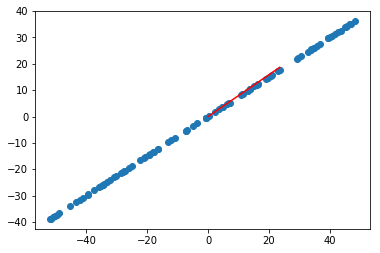

In [27]:
w2 = gradient_ascent(df_math, X2, ini_w2, eta)

plt.scatter(X2_demean[:,0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()